## ■ 5.12 seaborn 의 확률 밀도 함수 그래프와 히스토그램 그래프

하나의 변수 데이터의 분포를 확인할 대 displot() 함수를 이용한다.  
__기본값__으로 __히스토그램 그래프__와 __커널 밀도함수 그래프__를 출력한다.   
커널 밀도함수 그래프는 x축 사이의 면적이 1이 되도록 그리는 확률밀도분포 그래프이다.

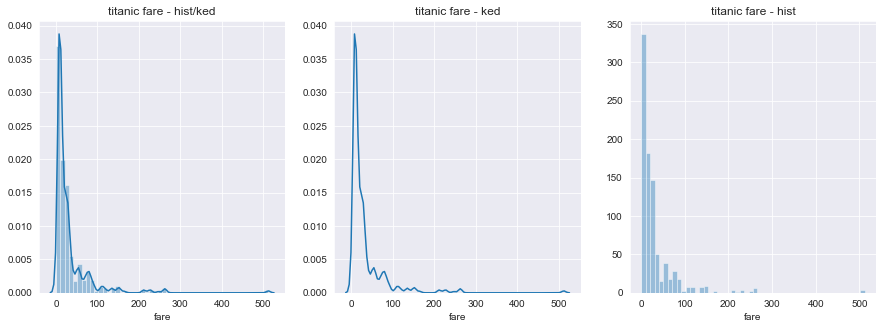

In [3]:
# 코드 Review!

# 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns
 
# Seaborn 제공 데이터셋 가져오기
# Seaborn모듈은 taitanic 자료를 기본으로 제공한다. 
titanic = sns.load_dataset('titanic')
 
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('darkgrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   # 전체 그래프 사이즈
ax1 = fig.add_subplot(1, 3, 1) # 1x3행렬의 서브플롯을 첫번째로 그린다.
ax2 = fig.add_subplot(1, 3, 2) # 1x3행렬의 서브플롯을 두번째로 그린다.
ax3 = fig.add_subplot(1, 3, 3) # 1x3행렬의 서브플롯을 세번째로 그린다.
 
# 기본값
sns.distplot(titanic['fare'], ax=ax1) 

# hist=False
sns.distplot(titanic['fare'], hist=False, ax=ax2) 

# kde=False
sns.distplot(titanic['fare'], kde=False, ax=ax3)        

# 차트 제목 표시
ax1.set_title('titanic fare - hist/ked')
ax2.set_title('titanic fare - ked') # 커널밀도함수
ax3.set_title('titanic fare - hist') # 히스토그램

plt.show()

### ※ 그래프를 해석 

타이타닉의 운임(fare)의 분포는 대체적으로 100달러 미만에 집중이 되어있다.

## 문제111. emp테이블의 월급으로 히스토그램 그래프와 확률밀도함수 그래프를 그리시오~

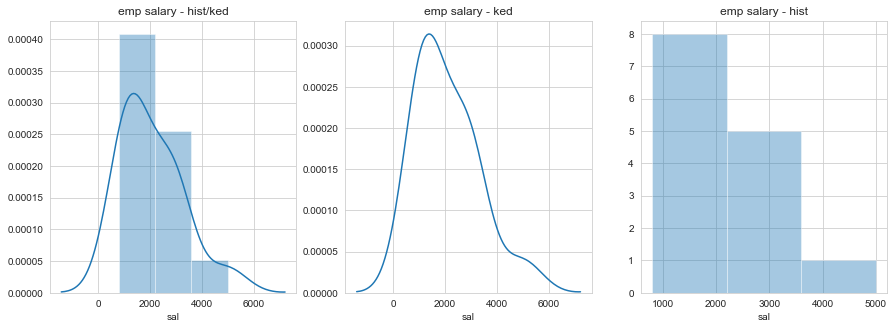

In [10]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

emp = pd.read_csv("d:\\data\\emp.csv")
 
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   # 전체 그래프 사이즈
ax1 = fig.add_subplot(1, 3, 1) # 1x3행렬의 서브플롯을 첫번째로 그린다.
ax2 = fig.add_subplot(1, 3, 2) # 1x3행렬의 서브플롯을 두번째로 그린다.
ax3 = fig.add_subplot(1, 3, 3) # 1x3행렬의 서브플롯을 세번째로 그린다.
 
# 기본값
sns.distplot(emp['sal'], ax=ax1) 

# hist=False
sns.distplot(emp['sal'], hist=False, ax=ax2) 

# kde=False
sns.distplot(emp['sal'], kde=False, ax=ax3)        

# 차트 제목 표시
ax1.set_title('emp salary - hist/ked')
ax2.set_title('emp salary - ked') # 커널밀도함수(확률밀도함수)
ax3.set_title('emp salary - hist') # 히스토그램

plt.show()

## ※ 확률 밀도 함수 그래프 설명

확률변수는 확률변수가 가질 수 있는 값들의 수와 명확성에 따라 2가지로 나뉜다.

### 1. 이산확률변수 : 정수와 같이 명확한 값을 변수 값으로 함.   
ex) 2개의 동전을 던져서 나오는 앞면의 수
### 2. 연속확률변수 : 
### 변수값이 정수처럼 명확하지가 못함.  확률변수가 연속량으로 표기되어 가능한 변수값의 개수를 셀수 없는 변수

ex) 서울지역 초등학교 학생들의 평균키

### 예제1. 모 도시의 초등학교 학생수는 전체 10만명입니다. 학생들의 평균키는 140이고 표준편차는 5입니다. 이 10만명의 초등학생 중 무작위로 한명을 추출했을 때 이 어린이의 키가 145~150 사이의 있을 확률은 어떻게 될까요? (점심시간 문제)

In [11]:
from sympy import exp, sqrt, pi, Integral, Symbol, S

x = Symbol('x') # 파이썬으로 수학문제를 풀 때 미지수를 설정하는 방법. 
p = exp(-(x-140)**2/(2*5**2))/(5*sqrt(2*pi))

result = Integral(p,(x,145,150)).doit().evalf() 
# doit() --> 실행
# evalf() --> 수학식을 풀어라

print(result)

0.135905121983278


### 문제112. 확률 밀도함수 공식을 이용하지 않고 직접 초등학생 10만명의 키를 생성해서 수행하시오~
### (평균이 140이고 표준편차 5, np.random(N_point)*5+140)

In [25]:
import numpy as np
N_points = 100000

height = np.random.randn(N_points)*5+140
cnt = 0

for i in range(len(height)):
    if height[i] > 145 and height[i] < 150:
        cnt += 1

print(cnt/len(height))

0.13734


## 문제113. 확률 밀도 함수 그래프를 scipy로만 그리시오! 
### 초등학생 키 140~160 사이의 키들을 무작위로 생성하고 평균키를 150으로하고 표준편차를 5로해서 확률 밀도함수 그래프를 그리시오.

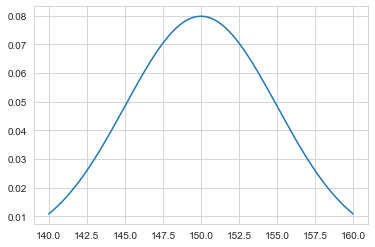

In [30]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(140,160,0.001)
plt.plot(x, norm.pdf(x,150,5)) 
# x값 넣고, 평균 150, 표준편차 5
# norm.pdf가 확률밀도함수를 뜻함.
plt.show()

## 문제114. seaborn의 displot를 이용하여 케글의 타이타닉의 나이 데이터를 시각화 하시오.

__결측치 확인하는 방법 :__ tat['Age'].isnull().sum(axis=0)

### ※ 결측치를 다른 나이 데이터의 평균으로 변경하기

mean_age = tat['Age'].mean(axis=0) # Age 열의 평균을 계산(Nan 값 제외)  
tat['Age'].fillna(mean_age, inplace = True)  

177
29.69911764705882


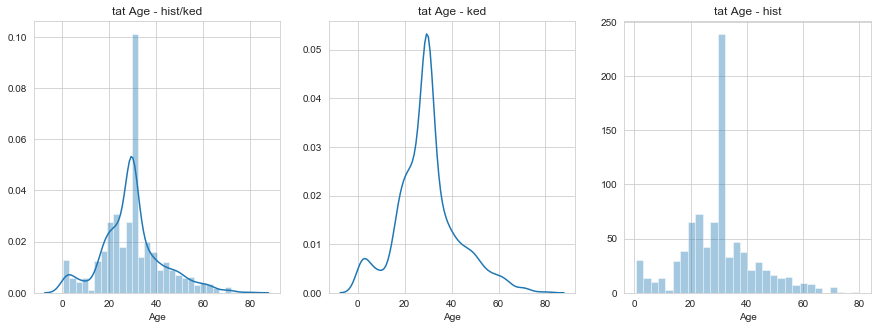

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tat = pd.read_csv("d:\\data\\train.csv")
print(tat['Age'].isnull().sum(axis=0))

mean_age = tat['Age'].mean(axis=0) # Age 열의 평균을 계산(Nan 값 제외)  
print(mean_age)

tat['Age'].fillna(mean_age, inplace = True)  

sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   # 전체 그래프 사이즈
ax1 = fig.add_subplot(1, 3, 1) # 1x3행렬의 서브플롯을 첫번째로 그린다.
ax2 = fig.add_subplot(1, 3, 2) # 1x3행렬의 서브플롯을 두번째로 그린다.
ax3 = fig.add_subplot(1, 3, 3) # 1x3행렬의 서브플롯을 세번째로 그린다.
 
# 기본값
sns.distplot(tat['Age'], ax=ax1) 

# hist=False
sns.distplot(tat['Age'], hist=False, ax=ax2) 

# kde=False
sns.distplot(tat['Age'], kde=False, ax=ax3)        

# 차트 제목 표시
ax1.set_title('tat Age - hist/ked')
ax2.set_title('tat Age - ked') # 커널밀도함수(확률밀도함수)
ax3.set_title('tat Age - hist') # 히스토그램

plt.show()

## 문제115. 이번에는 타이타닉 나이의 결측치를 평균값이 아니라 바로 앞에 있는 값으로 변경해서 그래프를 그리시오.

#### tat['Age'].fillna(method='ffill', inplace =True)

177
29.69911764705882


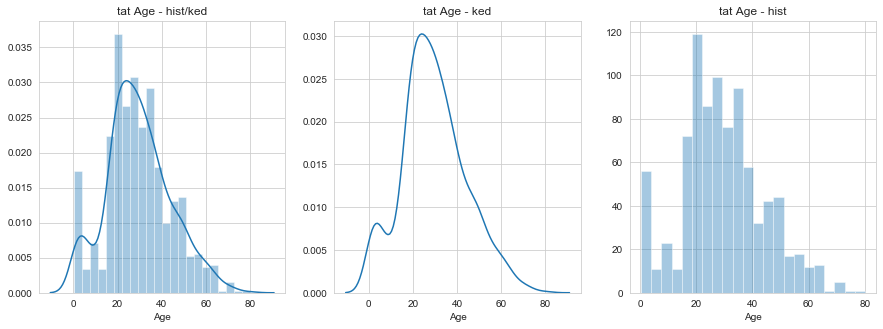

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tat = pd.read_csv("d:\\data\\train.csv")
print(tat['Age'].isnull().sum(axis=0))

mean_age = tat['Age'].mean(axis=0) # Age 열의 평균을 계산(Nan 값 제외)  
print(mean_age)

tat['Age'].fillna(method='ffill', inplace =True)

sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   # 전체 그래프 사이즈
ax1 = fig.add_subplot(1, 3, 1) # 1x3행렬의 서브플롯을 첫번째로 그린다.
ax2 = fig.add_subplot(1, 3, 2) # 1x3행렬의 서브플롯을 두번째로 그린다.
ax3 = fig.add_subplot(1, 3, 3) # 1x3행렬의 서브플롯을 세번째로 그린다.
 
# 기본값
sns.distplot(tat['Age'], ax=ax1) 

# hist=False
sns.distplot(tat['Age'], hist=False, ax=ax2) 

# kde=False
sns.distplot(tat['Age'], kde=False, ax=ax3)        

# 차트 제목 표시
ax1.set_title('tat Age - hist/ked')
ax2.set_title('tat Age - ked') # 커널밀도함수(확률밀도함수)
ax3.set_title('tat Age - hist') # 히스토그램

plt.show()

## ■ 5.13 seaborn으로 히트맵 그리기

seabron 라이브러리는 히트맵(heatmap)을 그리는 heatmap() 메소드를 제공한다.  
2개의 범주형 변수를 각각 x축과 y축에 놓고 데이터를 메트릭스 형태로 분류한다.  

In [46]:
table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc = 'size')

#### 설명 :  'sex'을 인덱스로 하고 'class'로 열 이름을 설정합니다.
#### aggfunc='size' 옵션은 데이터 값의 크기를 기준으로 집계한다는 뜻입니다.

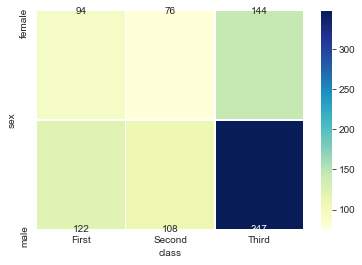

In [55]:
# Full code 설명
import   numpy   as   np
import   matplotlib.pyplot   as  plt
import seaborn as sns

# 데이터 불러오기
titanic = sns.load_dataset('titanic')
table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc = 'size')
sns.heatmap(table, annot = True, fmt = 'd', cmap = 'YlGnBu', linewidth = 0.5, cbar = True)
# table -> 데이터 프레임
# annot =True -> 데이터 값 표시 여부
# fmt = 'd' -> 정수형 포맷
# camp = 'YlGnBu' -> 컬러맵 (Google cmap 검색해 볼것)
# linewidth= .5 -> 구분선
# cbar = True -> 컬러 바 표시 여부

plt.show()

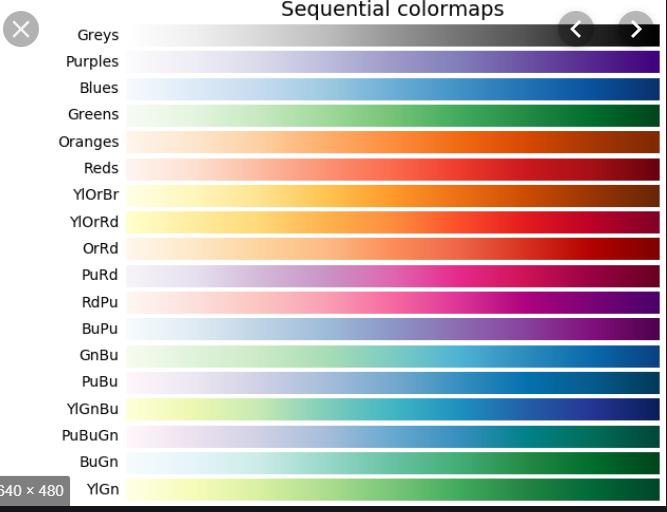

## 문제115. 타이타닉호에서 남자가 더 많이 생존하였는지 여자가 더 많이 생존했는지 heatmap으로 확인해보시오~~

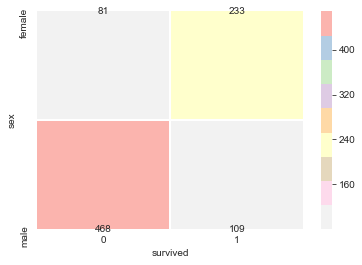

In [62]:
# Full code 설명
import   numpy   as   np
import   matplotlib.pyplot   as  plt
import seaborn as sns

# 데이터 불러오기
titanic = sns.load_dataset('titanic')
table = titanic.pivot_table(index=['sex'], columns=['survived'], aggfunc = 'size')
sns.heatmap(table, annot = True, fmt = 'd', cmap = 'Pastel1_r', linewidth = 0.9, cbar = True)
# table -> 데이터 프레임
# annot =True -> 데이터 값 표시 여부
# fmt = 'd' -> 정수형 포맷
# camp = 'YlGnBu' -> 컬러맵 (Google cmap 검색해 볼것)
# linewidth= .5 -> 구분선
# cbar = True -> 컬러 바 표시 여부

plt.show()

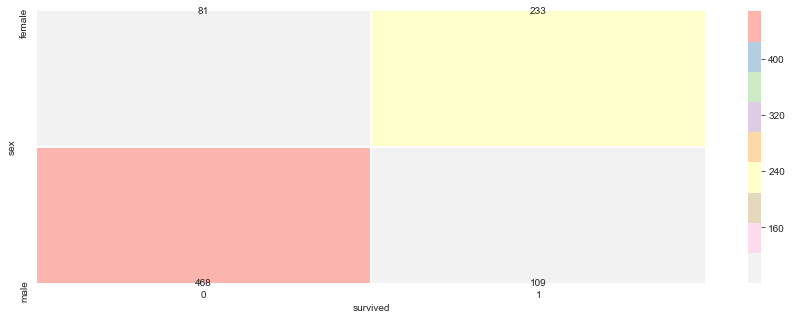

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

tatanic = pd.read_csv("d:\\data\\train.csv")

# 성별을 인덱스로 하고 class 로 열 이름을 설정합니다.
# aggfunc='size' 옵션은 데이터 값의 크기를 기준으로 집계한다는 뜻입니다.
table = titanic.pivot_table(index=['sex'], columns =['survived'],
                            aggfunc='size' )
plt.figure(figsize=(15, 5))
sns.heatmap(table,              # 데이터 프레임
            annot = True,        # 데이터 값 표시 여부
            fmt = 'd',          # 정수형 포멧
            cmap = 'Pastel1_r',    # 컬러 맵
            linewidth=.5,       # 구분선
            cbar=True)         # 컬러 바 표시 여부
plt.show()

## ■ 5.1  seaborn으로 산포도 그래프 그리기!

범주형 변수에 들어있는 각 범주별 데이터의 분포를 확인하는 그래프입니다.  
두개의 함수를 사용하면 되는데 __stripplot() 함수__와 __swarmplot() 함수__를 사용할 수 있다.  
__swarmplot() 함수__는 데이터의 분산까지 고려하여 데이터 포인트가 서로 중복되지 않도록 그린다.  
즉, 데이터가 퍼져있는 정도를 입체적으로 볼 수 있다.

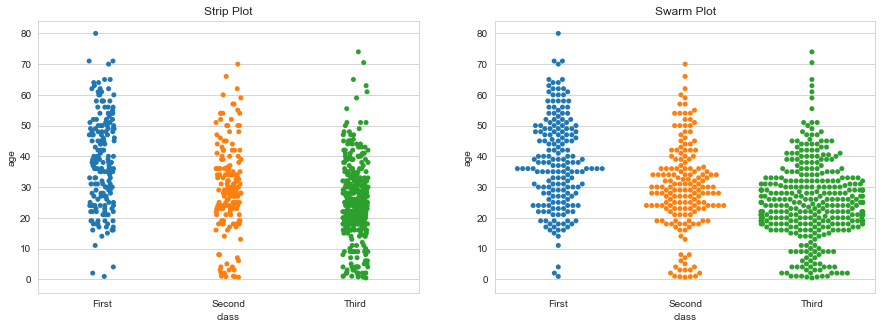

In [76]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
 
# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')
 
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
 
# 이산형 변수의 분포 - 데이터 분산 미고려
sns.stripplot(x="class",      #x축 변수
              y="age",        #y축 변수           
              data=titanic,   #데이터셋 - 데이터프레임
              ax=ax1)         #axe 객체 - 1번째 그래프 

# 이산형 변수의 분포 - 데이터 분산 고려 (중복 X) 
sns.swarmplot(x="class",      #x축 변수
              y="age",        #y축 변수
              data=titanic,   #데이터셋 - 데이터프레임
              ax=ax2)         #axe 객체 - 2번째 그래프        

# 차트 제목 표시
ax1.set_title('Strip Plot')
ax2.set_title('Swarm Plot')

plt.show()

## 문제116. 사원테이블에서 20번 부서번호의 속한 사원들이 몇명인지 출력하시오.

* 판다스의 그룹함수 사용문법  

emp['sal'].max()  #최대값  
emp['sal'].min()  #최소값  
emp['sal'].sum()  #토탈값  
emp['sal'].count() #건수  
emp['sal'].mean()  #평균값  
emp['sal'].var()  #분산값  
emp['sal'].std()  #표준편차값  

In [124]:
import pandas as pd
emp = pd.read_csv("d:\\data\\emp.csv")

print(emp, end = '\n\n')
print(emp['sal'][emp['deptno']==20].count())

    empno   ename        job     mgr    hiredate   sal    comm  deptno
0    7839    KING  PRESIDENT     NaN  1981-11-17  5000     NaN      10
1    7698   BLAKE    MANAGER  7839.0  1981-05-01  2850     NaN      30
2    7782   CLARK    MANAGER  7839.0  1981-05-09  2450     NaN      10
3    7566   JONES    MANAGER  7839.0  1981-04-01  2975     NaN      20
4    7654  MARTIN   SALESMAN  7698.0  1981-09-10  1250  1400.0      30
5    7499   ALLEN   SALESMAN  7698.0  1981-02-11  1600   300.0      30
6    7844  TURNER   SALESMAN  7698.0  1981-08-21  1500     0.0      30
7    7900   JAMES      CLERK  7698.0  1981-12-11   950     NaN      30
8    7521    WARD   SALESMAN  7698.0  1981-02-23  1250   500.0      30
9    7902    FORD    ANALYST  7566.0  1981-12-11  3000     NaN      20
10   7369   SMITH      CLERK  7902.0  1980-12-09   800     NaN      20
11   7788   SCOTT    ANALYST  7566.0  1982-12-22  3000     NaN      20
12   7876   ADAMS      CLERK  7788.0  1983-01-15  1100     NaN      20
13   7

## ★문제117. 아래의 SQL을 판다스로 변경하시오~

In [126]:
"""
SQL> 
select deptno, sum(sal)
    from emp
    group by deptno;
"""

import pandas as pd
emp = pd.read_csv("d:\\data\\emp.csv")

print(emp, end = '\n\n')

result = emp.groupby('deptno')['sal'].sum()

print(result) # result의 data형태 : Series
print(type(result))

    empno   ename        job     mgr    hiredate   sal    comm  deptno
0    7839    KING  PRESIDENT     NaN  1981-11-17  5000     NaN      10
1    7698   BLAKE    MANAGER  7839.0  1981-05-01  2850     NaN      30
2    7782   CLARK    MANAGER  7839.0  1981-05-09  2450     NaN      10
3    7566   JONES    MANAGER  7839.0  1981-04-01  2975     NaN      20
4    7654  MARTIN   SALESMAN  7698.0  1981-09-10  1250  1400.0      30
5    7499   ALLEN   SALESMAN  7698.0  1981-02-11  1600   300.0      30
6    7844  TURNER   SALESMAN  7698.0  1981-08-21  1500     0.0      30
7    7900   JAMES      CLERK  7698.0  1981-12-11   950     NaN      30
8    7521    WARD   SALESMAN  7698.0  1981-02-23  1250   500.0      30
9    7902    FORD    ANALYST  7566.0  1981-12-11  3000     NaN      20
10   7369   SMITH      CLERK  7902.0  1980-12-09   800     NaN      20
11   7788   SCOTT    ANALYST  7566.0  1982-12-22  3000     NaN      20
12   7876   ADAMS      CLERK  7788.0  1983-01-15  1100     NaN      20
13   7

## 문제118. 아래의 SQL을 판다스로 변경하시오~

In [95]:
"""
SQL> 
select deptno, sum(sal)
    from emp
    where deptno != 20
    group by deptno;
"""

import pandas as pd
emp = pd.read_csv("d:\\data\\emp.csv")
result = emp.groupby('deptno')['sal'].sum().reset_index()
# 설명 : reset_index()는 Series로 저장하는게 아니라 DataFrame으로 저장하는 키워드입니다.

print(result) # result의 data형태 : DataFrame
print(type(result), end = '\n\n\n')

result2 = result[:][result['deptno'] != 20]
print(result2)

   deptno    sal
0      10   8750
1      20  10875
2      30   9400
<class 'pandas.core.frame.DataFrame'>


   deptno   sal
0      10  8750
2      30  9400


## 문제119. 아래의 SQL을 Pandas로 구현하시오!

__힌트 :__ sort_values(ascending = False) 를 사용해볼것!

In [100]:
"""
SQL> 
select job, sum(sal)
    from emp
    where job != 'SALESMAN'
    group by job;
    order by sum(sal) desc;
"""
import pandas as pd
emp = pd.read_csv("d:\\data\\emp.csv")
result = emp.groupby('job')['sal'].sum().reset_index()
# 설명 : reset_index()는 Series로 저장하는게 아니라 DataFrame으로 저장하는 키워드입니다.


result2 = result[:][result['job'] != 'SALESMAN']
print(result2.sort_values('sal', ascending= False))

         job   sal
2    MANAGER  8275
0    ANALYST  6000
3  PRESIDENT  5000
1      CLERK  4150


In [101]:
import pandas as pd
emp = pd.read_csv("d:\\data\\emp.csv")
result = emp.groupby(emp['job'])['sal'].sum().sort_values(ascending=False).reset_index()
a = result[:][result['job'] != 'SALESMAN']
print(a)

         job   sal
0    MANAGER  8275
1    ANALYST  6000
3  PRESIDENT  5000
4      CLERK  4150


### 문제120. 케글의 타이타닉 데이터에서 나이와 나이별 인원수를 출력하는데, 나이별 인원수가 높은것부터 출력하시오!

In [194]:
import seaborn as sns
import pandas as pd

tat = pd.read_csv('D:\\data\\train.csv')
a = tat['Age'].value_counts().sort_values(ascending=False).reset_index()
print(a)
a.rename({'Age':'count'}, axis=1, inplace=True)
a.rename({'index':'Age'}, axis=1, inplace=True)

print(a)

    index  Age
0   24.00   30
1   22.00   27
2   18.00   26
3   19.00   25
4   30.00   25
..    ...  ...
83  14.50    1
84   0.67    1
85  24.50    1
86  20.50    1
87   0.42    1

[88 rows x 2 columns]
      Age  count
0   24.00     30
1   22.00     27
2   18.00     26
3   19.00     25
4   30.00     25
..    ...    ...
83  14.50      1
84   0.67      1
85  24.50      1
86  20.50      1
87   0.42      1

[88 rows x 2 columns]


## ■ 5.15 seaborn으로 막대 그래프 그리기

3개의 axe 객체 (서브플롯)을 만들고, x축과 y축의 변수를 할당하고   
hue옵션을 추가하여 누적 출력순으로 시각화

__* 3개의 컬럼을 사용__
    1. x축 : 성별
    2. y축 : 생존여부
    3. hue 옵션 
        - class(seborn 에서 제공하는 컬럼명)
        - pclass(케글에서 제공하는 컬럼명)

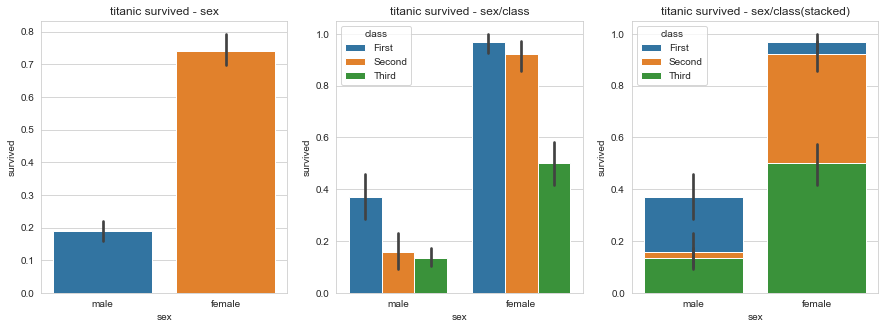

In [134]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns
 
# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')
 
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
 
# x축, y축에 변수 할당
sns.barplot(x='sex', y='survived', data=titanic, ax=ax1) 

# x축, y축에 변수 할당하고 hue 옵션 추가 
sns.barplot(x='sex', y='survived', hue='class', data=titanic, ax=ax2) 

# x축, y축에 변수 할당하고 hue 옵션을 추가하여 누적 출력
sns.barplot(x='sex', y='survived', hue='class', dodge=False, data=titanic, ax=ax3)       
# dodge = False 로 설정하면 하나의 그래프에 다들어가게 한다.

# 차트 제목 표시
ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class(stacked)')

plt.show()

## 문제121. 케글 타이타닉 데이터로 위의 그래프를 그려보시오!

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


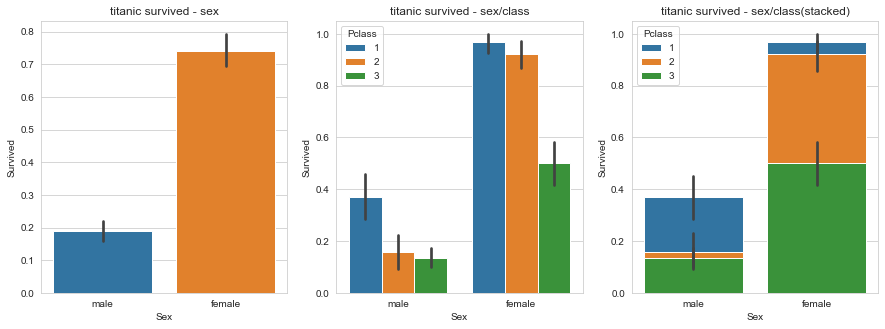

In [138]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Seaborn 제공 데이터셋 가져오기
titanic = pd.read_csv("d:\\data\\train.csv")
print(titanic.columns)

# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
 
# x축, y축에 변수 할당
sns.barplot(x='Sex', y='Survived', data=titanic, ax=ax1) 

# x축, y축에 변수 할당하고 hue 옵션 추가 
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=titanic, ax=ax2) 

# x축, y축에 변수 할당하고 hue 옵션을 추가하여 누적 출력
sns.barplot(x='Sex', y='Survived', hue='Pclass', dodge=False, data=titanic, ax=ax3)       
# dodge = False 로 설정하면 하나의 그래프에 다들어가게 한다.

# 차트 제목 표시
ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class(stacked)')

plt.show()

## ■ 5.16 seaborn으로 빈도 그래프 그리기

각 범주에 속하는 데이터의 갯수를 막대 그래프로 나타낼 때, __countplot()함수__를 사용하면 된다.

__첫번째 그래프 :__ 운임 클래스 별로 인원수가 어떻게 되는지 확인  
__두번째 그래프 :__ 운임 클래스 별로 인원수를 확인하는데 남자, 여자, 아이로 구분해서 확인. (컬럼 who)  
__세번째 그래프 :__ 축방향으로 hue변수를 분리하지 않고 위로 쌓아올리는 누적그래프로 출력하면서 색상 구성을 palette 옵션을 적용하여 출력함.

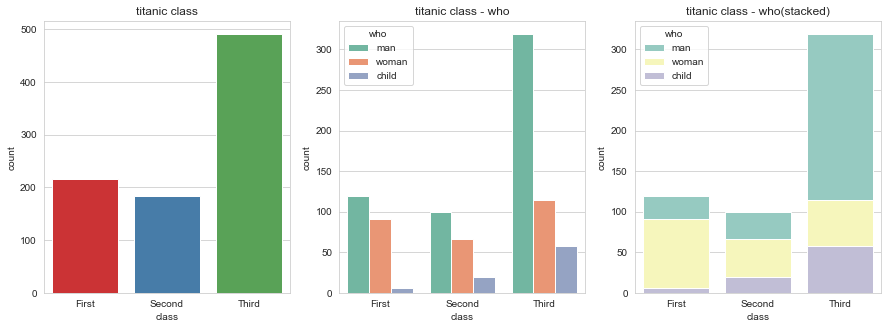

In [139]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns
 
# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')
 
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
 
# 기본값
sns.countplot(x='class', palette='Set1', data=titanic, ax=ax1) 

# hue 옵션에 'who' 추가 
sns.countplot(x='class', hue='who', palette='Set2', data=titanic, ax=ax2) 

# dodge=False 옵션 추가 (축 방향으로 분리하지 않고 누적 그래프 출력)
sns.countplot(x='class', hue='who', palette='Set3', dodge=False, data=titanic, ax=ax3)       

# 차트 제목 표시
ax1.set_title('titanic class')
ax2.set_title('titanic class - who')
ax3.set_title('titanic class - who(stacked)')

plt.show()

### 문제122. emp 데이터프레임으로 부서번호별로 인원수를 막대그래프로 출력하는데 출력하는것을 첫번째 그래프로 하고 두번째,세번재 그래프는 hue옵션에 직업을 넣어서 각각 직업별로 막대그래프가 출력되게 하시오!

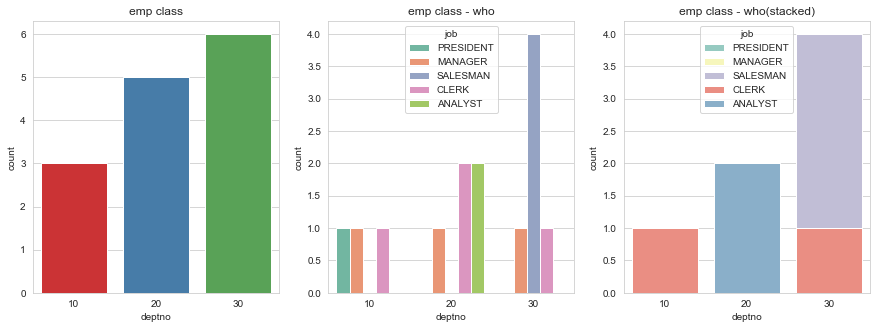

In [141]:

# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns
import  pandas  as  pd 

# Seaborn 제공 데이터셋 가져오기
emp = pd.read_csv("d:\\data\\emp.csv")
 
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
 
# 기본값
sns.countplot(x='deptno', palette='Set1', data=emp, ax=ax1) 

# hue 옵션에 'who' 추가 
sns.countplot(x='deptno', hue='job', palette='Set2', data=emp, ax=ax2) 

# dodge=False 옵션 추가 (축 방향으로 분리하지 않고 누적 그래프 출력)
sns.countplot(x='deptno', hue='job', palette='Set3', dodge=False, data=emp, ax=ax3)       

# 차트 제목 표시
ax1.set_title('emp class')
ax2.set_title('emp class - who')
ax3.set_title('emp class - who(stacked)')

plt.show()

## ■ 5.17 seaborn으로 박스 그래프와 바이올린 그래프 그리기

박스 그래프와 바이올린 그래프는 데이터의 분포와 분산정도를 확인할 때 유용하다.  
박스 그래프만으로는 분산의 정도를 정확하게 알기는 어렵기 때문에   
커널 밀도 함수 그래프를 y축 방향으로 추가하여 바이올린 그래프를 그리는 경우도 있다.

__문법 :__ boxplot()  
__문법 :__ violinplot()  

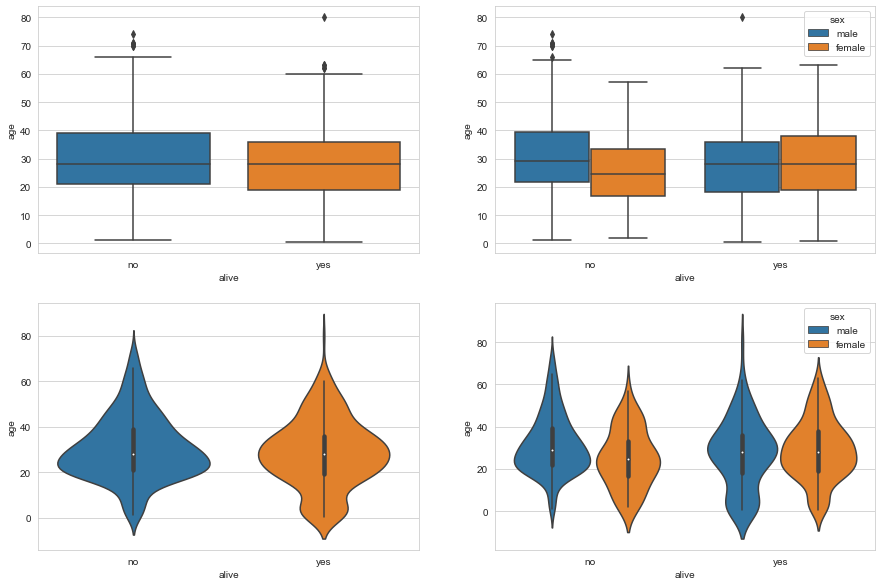

In [142]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import matplotlib.pyplot as plt
import seaborn as sns
 
# Seaborn 제공 데이터셋 가져오기
titanic = sns.load_dataset('titanic')
 
# 스타일 테마 설정 (5가지: darkgrid, whitegrid, dark, white, ticks)
sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 4개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 10))   
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
 
# 박스 그래프 - 기본값
sns.boxplot(x='alive', y='age', data=titanic, ax=ax1) 

# 바이올린 그래프 - hue 변수 추가
sns.boxplot(x='alive', y='age', hue='sex', data=titanic, ax=ax2) 

# 박스 그래프 - 기본값
sns.violinplot(x='alive', y='age', data=titanic, ax=ax3) 

# 바이올린 그래프 - hue 변수 추가
sns.violinplot(x='alive', y='age', hue='sex', data=titanic, ax=ax4) 

plt.show()

## ■ 데이터의 퍼짐을 측정하는 방법

1. 범위
2. 사분위수 범위

__평균값__과 __중앙값__과 __최빈값__으로는 데이터 분석을 하기에 부족한 경우가 있다.  
평균 데이터는 데이터의 중심이 어디쯤인지는 알려주지만  
특정 데이터가 평균을 중심으로 어떻게 분포가 되어 있는지는 알려주지 않는다. 그래서 __범위__와 __사분위수 범위__를 알아야 한다.

### 예제: 어느 농구단의 감독이 아래의 3명의 농구 선수중에 한명을 선택하려고 한다.  아래의 3명의 농구 선수들의 게임별 점수(득점)을 가지고 한명을 고른다면 어떤 선수를 골라야할까요?

In [ ]:
x1 = [7,8,9,9,10,10,11,11,12,13]
x2 = [7,9,9,10,10,10,10,11,11,13]
x3 = [3,3,6,7,7,10,10,10,11,13,30]

## 문제123. 위의 농구선수 3명의 득점 점수의 평균값, 중앙값, 최빈값을 각각 구하세요~

In [157]:
import pandas as pd

dict_data = {'x1' : [7,8,9,9,10,10,11,11,12,13], 'x2' : [7,9,9,10,10,10,10,11,11,13], 'x3' : [3,3,6,7,7,10,10,11,13,30] }

df = pd.DataFrame(dict_data)
print(df, end = '\n\n')
print(df.describe())

   x1  x2  x3
0   7   7   3
1   8   9   3
2   9   9   6
3   9  10   7
4  10  10   7
5  10  10  10
6  11  10  10
7  11  11  11
8  12  11  13
9  13  13  30

              x1         x2         x3
count  10.000000  10.000000  10.000000
mean   10.000000  10.000000  10.000000
std     1.825742   1.563472   7.760298
min     7.000000   7.000000   3.000000
25%     9.000000   9.250000   6.250000
50%    10.000000  10.000000   8.500000
75%    11.000000  10.750000  10.750000
max    13.000000  13.000000  30.000000


### ※설명  
### 3명의 농구선수가 모두 중앙값, 평균값, 최빈값이 다 동일해서 특정선수를 다 선택하기가 어렵다.   
### 그래서 감독이 각 선수의 점수가 어떻게 분포가 되어있는지 분포 방식을 측정할 수 있으면 결정을 내리는데 도움을 줄 수 있을것이다.

__범위(range)__

x1 --> 7(min) ~ 13(max)    
x2 --> 7(min) ~ 13(max)  
x3 --> 3(min) ~ 30(max)  

범위(range) 는 그 자체로는 데이터의 폭만 설명할 뿐 그 안에 데이터가 분포되는 방식을 설명해주지 않는다.  
특히 이상치에는 민감하다.  
3번째 선수 같은 경우 어쩌다가 한번 잘한 게임(30점)인 이상치 때문에 범위가 넓어져 버리게 되었다.  

그래서 이상치로 부터 멀어질 필요가 있다. 그걸 해결하는 방법이 바로 __"사분위수 범위"__ 입니다.

## 문제124. 3번째 선수 점수로 박스 그래프를 그리고 이상치가 보이는지 확인하시오.

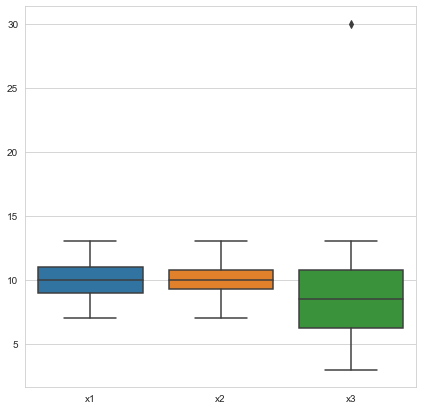

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
data = {'x1' : [7,8,9,9,10,10,11,11,12,13], 'x2' : [7,9,9,10,10,10,10,11,11,13], 
        'x3' : [3,3,6,7,7,10,10,11,13, 30]}

df = pd.DataFrame(data)

plt.figure(figsize = (7, 7))
sns.boxplot(data = df)

### ※그래프 분석 
그래프를 보면 2번 선수가 3번선수보다 상대족으로 좁은 범위를 가지고 있다.   
3번선수는 넓은 범위를 가지고 있고 3번 선수는 2번 선수에 비해 훨씬 높은 점수(30범)을 득점하였지만   
다른 경우에는 훨씬 낮은 점수에 대한 기록도 보인다.  
그래서 2번선수가 더 일관성이 있고, 대부분의 경우에 3번 선수보다 더 높은점수를 기록했다.   
따라서 둘중에 한사람을 고른다면 2번 선수를 고를것같다.

### 1번선수 

| 0% |        25%       |    50%    |        75%       | 100% |
|:--:|:----------------:|:---------:|:----------------:|:----:|
|  7 |         9        |     10    |        11        |  13  |
|    | 하한 사분위수 Q1 | 중앙값 Q2 | 상한 사분위수 Q3 |      |

__이런값들을 구하는 이유가 무엇인가?__

__답 :__ 이상치 때문이다. 이상치를 제거하고 가운데 50%의 데이터에만 집중함으로써 문제를 우호할 수 있는것이다.

## ■ 3번 선수의 이상치값이 30을 알아내기 위한 함수를 생성하시오!

## 문제125. np.percentile을 이용해서 3번 선수의 Q1값과 Q3값을 출력하시오.

__(힌트 : np.percentile(컬럼명,25))__

In [180]:
import pandas as pd
import numpy as np

data = {'x1' : [7,8,9,9,10,10,11,11,12,13], 'x2' : [7,9,9,10,10,10,10,11,11,13], 
        'x3' : [3,3,6,7,7,10,10,11,13, 30]}

team = pd.DataFrame(data)


Q1 = np.percentile(team['x3'],25)
Q3 = np.percentile(team['x3'],75)

print(Q1)
print(Q3)

6.25
10.75


## 설명 : IQR? 
#### Q1과 Q3의 차이인 사분위수 범위

## 문제126. 아래의 코드를 이용하여 outlier_detect라는 함수를 생성하는데 3번 선수의 outlier 값인 30이 출력되는지 함수를 만들고 확인해보시오.

In [184]:
# 이상치를 구하는 코드

import pandas as pd
import numpy as np 

dict_data = {'x1' : [7,8,9,9,10,10,11,11,12,13], 'x2' : [7,9,9,10,10,10,10,11,11,13], 
        'x3' : [3,3,6,7,7,10,10,11,13, 30]}

x = pd.DataFrame(dict_data)

Q1 = np.percentile(x['x3'],25)
Q3 = np.percentile(x['x3'],75)
IQR = abs(Q1 - Q3)

outlier_step = 1.5* IQR
outlier_list_col = x[(x['x3'] < Q1 - outlier_step) | (x['x3'] > Q3 + outlier_step )].index

result = x['x3'][outlier_list_col]

print(result)

9    30
Name: x3, dtype: int64


## 문제127. 케글 타이타닉 데이터의 나이데이터에 이상치를 위의 코드로 출력하시오!
### (결측치 앞의 데이터로 채워서 수행하세요 ~~)

In [192]:
import pandas as pd
import numpy as np 

tat = pd.read_csv("d:\\data\\train.csv")
tat['Age'].fillna(method='ffill', inplace =True)

Q1 = np.percentile(tat['Age'],25)
Q3 = np.percentile(tat['Age'],75)
IQR = abs(Q1 - Q3)

outlier_step = 1.5* IQR
outlier_list_col = tat[(tat['Age'] < Q1 - outlier_step) | (tat['Age'] > Q3 + outlier_step )].index

result = tat['Age'][outlier_list_col]
print(result)

33     66.0
96     71.0
116    70.5
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64


## ■ 6장. 데이터 사전 처리

## ■ 6.1 누락 데이터 처리

머신러닝 데이터 분석의 정확도는 분석 데이터의 품질에 의해 좌우된다.  
데이터 품질을 높이기 위해서는 __누락 데이터 처리, 중복 데이터 처리__등 오류를 수정하고 분석 목적에 맞게 변형하는 과정이 필요하다.

데이터프레임에는 원소 데이터 값이 종종 누락되는 경우가 있다.  
일반적을 유효한 데이터 값이 존재하지 않는 누락 데이터를 NaN(Not a Number)로 표시한다.  
머신러닝 분석 모형에 데이터를 입력하기 전에 반드시 누락 데이터를 제거하거나 다른 적절한 값을 대체하는 과정이 필요하다.  

누락 데이터가 많아지면 데이터의 품질이 떨어지고, 머신러닝 분석알고리즘을 왜곡하는 현상이 발생하기 때문이다. 

* 누락 데이터를 찾는 메소드

    1. isnull() : 누락 데이터면 True를 반환하고, 유효한 데이터가 존재하면 False를 반환한다.
    2. notnull() : 유효한 데이터가 존재하면 True를 반환하고, 누락 데이터면 False를 반환한다.

## 예제1. 타이타닉 전체 데이터에 누락데이터가 얼마나 있는지 확인하는 방법

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns
 
# Seaborn 제공 데이터셋 가져오기
tat = sns.load_dataset('titanic')

# 일단 head()로 위의 5개만 가져오기
print(tat.head().isnull())
print(tat.head().isnull().sum(axis=0))
# 설명 : deck 컬럼만 3개이고 나머지는 0으로 출력되고 있다.

   survived  pclass    sex    age  sibsp  parch   fare  embarked  class  \
0     False   False  False  False  False  False  False     False  False   
1     False   False  False  False  False  False  False     False  False   
2     False   False  False  False  False  False  False     False  False   
3     False   False  False  False  False  False  False     False  False   
4     False   False  False  False  False  False  False     False  False   

     who  adult_male   deck  embark_town  alive  alone  
0  False       False   True        False  False  False  
1  False       False  False        False  False  False  
2  False       False   True        False  False  False  
3  False       False  False        False  False  False  
4  False       False   True        False  False  False  
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           3
emb

## 문제128. 타이타닉 전체 데이터의 누락 데이터가 어떻게 되는지 아래와 같이 컬럼별로 출력하시오!

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns
 
# Seaborn 제공 데이터셋 가져오기
df = sns.load_dataset('titanic')

print(df.isnull().sum(axis=0))
# 설명 : deck 컬럼만 3개이고 나머지는 0으로 출력되고 있다.

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [205]:
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')

# for 반복문으로 각 열의 NaN 개수 계산하기
missing_df = df.isnull()
print(missing_df)

for col in missing_df.columns:
    missing_count = missing_df[col].value_counts()    # 각 열의 NaN 개수 파악
    try: 
        print(col, ': ', missing_count[True])   # NaN 값이 있으면 개수를 출력
    except:
        print(col, ': ', 0)                     # NaN 값이 없으면 0개 출력

     survived  pclass    sex    age  sibsp  parch   fare  embarked  class  \
0       False   False  False  False  False  False  False     False  False   
1       False   False  False  False  False  False  False     False  False   
2       False   False  False  False  False  False  False     False  False   
3       False   False  False  False  False  False  False     False  False   
4       False   False  False  False  False  False  False     False  False   
..        ...     ...    ...    ...    ...    ...    ...       ...    ...   
886     False   False  False  False  False  False  False     False  False   
887     False   False  False  False  False  False  False     False  False   
888     False   False  False   True  False  False  False     False  False   
889     False   False  False  False  False  False  False     False  False   
890     False   False  False  False  False  False  False     False  False   

       who  adult_male   deck  embark_town  alive  alone  
0    False      

## ■ 6.2 누락 데이터 제거

1. 열을 삭제하는 방법 : df.dropno(axis=1, thresh=500)  
    * 설명 : Nan 값이 500개 이상이 되는 모든 열을 삭제해라.  

전체 891명의 승객중에서 deck는 688명이 누락되어있다.  
누락 데이터가 차지하는 비율이 높기 때문에 deck열은 삭제해서 분석에서 제외한다.

In [206]:
# 열을 삭제하는 방법
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')

# 열을 삭제하기
df_thresh = df.dropna(axis=1, thresh=500)
print(df_thresh.columns) # 결과를 보면 deck 컬럼이 제거되어있음.

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')


2. 누락행을 치환하는 방법
    - 평균으로 누락 데이터를 바꾸기
    - 가장 많이 나타나는 데이터로 누락 데이터를 바꾸기
    - 이웃하고 있는 값으로 누락 데이터를 바꾸기

###   1. 평균으로 누락 데이터 바꾸기

mean_age = df['age'].mean(axis=0)  
df['age'].fillna(mean_age, inplace=True)  

### 2. 가장 많이 나타나는 데이터로 누락 데이터 바꾸기

most_freq = df['age'].value_counts(dropna=True).idxmax()  
df['age'].fillna(most_freq, inplace=True)    

### 3. 이웃하고 있는 데이터로 누락 데이터 바꾸기

df['age'].fillna(method='ffill', inplace = True)

## 문제129.(오늘의 마지막 문제) kaggle의 타이타닉 데이터의 나이 컬럼을 가지고 오전에 그린 히스토그램 그래프와 확률밀도함수를 그리는데 가장 많이 나타나는 데이터로 누락데이터를 변경해서 그리시오.

177


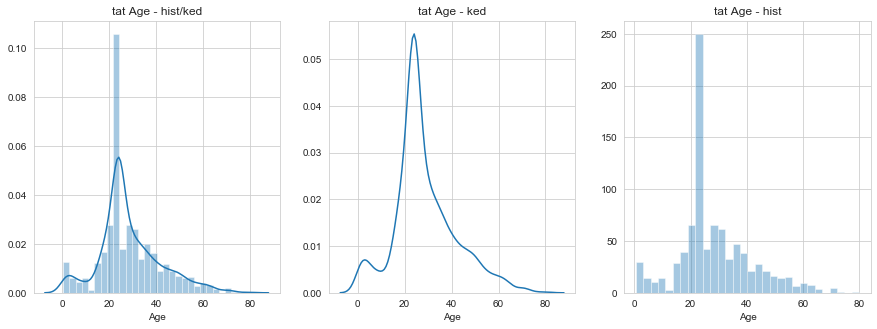

In [207]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tat = pd.read_csv("d:\\data\\train.csv")
print(tat['Age'].isnull().sum(axis=0))

most_freq = tat['Age'].value_counts(dropna=True).idxmax() 

tat['Age'].fillna(most_freq, inplace = True)  

sns.set_style('whitegrid')

# 그래프 객체 생성 (figure에 3개의 서브 플롯을 생성)
fig = plt.figure(figsize=(15, 5))   # 전체 그래프 사이즈
ax1 = fig.add_subplot(1, 3, 1) # 1x3행렬의 서브플롯을 첫번째로 그린다.
ax2 = fig.add_subplot(1, 3, 2) # 1x3행렬의 서브플롯을 두번째로 그린다.
ax3 = fig.add_subplot(1, 3, 3) # 1x3행렬의 서브플롯을 세번째로 그린다.
 
# 기본값
sns.distplot(tat['Age'], ax=ax1) 

# hist=False
sns.distplot(tat['Age'], hist=False, ax=ax2) 

# kde=False
sns.distplot(tat['Age'], kde=False, ax=ax3)        

# 차트 제목 표시
ax1.set_title('tat Age - hist/ked')
ax2.set_title('tat Age - ked') # 커널밀도함수(확률밀도함수)
ax3.set_title('tat Age - hist') # 히스토그램

plt.show()